## Image classification using Food-101 dataset

### Task description
1. Grab the dataset from https://huggingface.co/datasets/food101
2. Implement a convolutional neural network for multiclass image classification.
3. Use https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html or `dl_lab5` for inspiration.

In [ ]:
!pip install pyarrow

In [ ]:
import torch
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from PIL import Image
import io
import torchvision.transforms as transforms

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

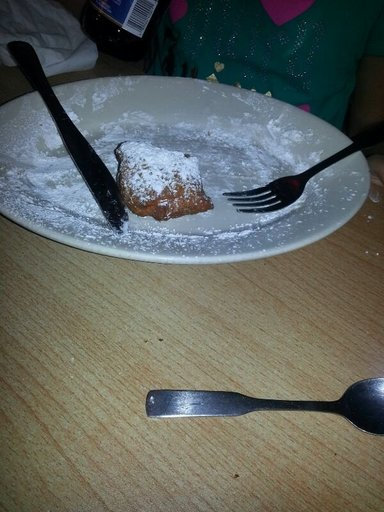

In [ ]:
train_data = load_dataset("food101", split="train[:]")
train_data[0]["image"]

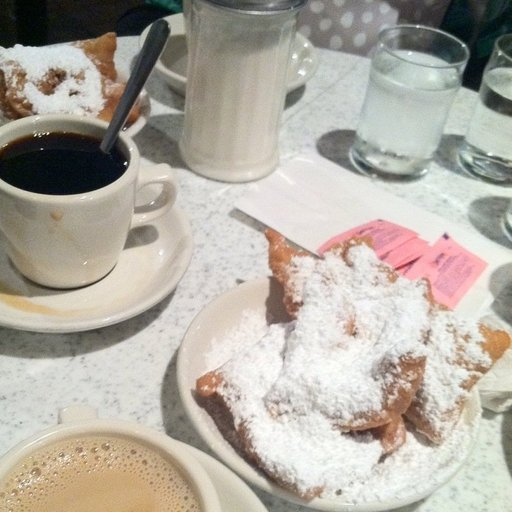

In [ ]:
val_data = load_dataset("food101", split="validation[:]")
val_data[0]["image"]

In [ ]:
train_data.shape

(75750, 2)

In [ ]:
val_data.shape

(25250, 2)

In [ ]:
train_dict = train_data.to_dict()

In [ ]:
train_df = pd.DataFrame(train_dict)

In [ ]:
print(train_df.columns)

Index(['image', 'label'], dtype='object')


In [ ]:
print(train_df.head())

                                               image  label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      6
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      6
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      6
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      6
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      6


In [ ]:
val_dict = val_data.to_dict()

In [ ]:
val_df = pd.DataFrame(val_dict)


In [ ]:
print(val_df.columns)

Index(['image', 'label'], dtype='object')


In [ ]:
print(val_df.head())

                                               image  label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      6
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      6
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      6
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      6
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      6


In [ ]:
val_df.label.unique()

array([  6,  79,  81,  53,  10,  20,  77,  48,  86,  84,  76,  34,  51,
        21,  64,   0,  43,  44,  73,  57,  14,   5,  46,  55,  93,  98,
        38,  11,  99,  72,  22,  59,  70,  16,   2,  58,  83,  96,  39,
        49,  45,  88,   9,  26,  94,   4,  65,  32,  27,  36,  87,  69,
        85,  25,  40,  19,  35,  56,  42,  60,  68, 100,  41,  92,  24,
         3,  89,  75,  17,  97,  61,  33,  80,  30,   8,  74,  66,  31,
        18,  67,  37,  13,  63,  28,  47,  52,  54,   1,  82,  91,  95,
         7,  29,  78,  15,  23,  12,  62,  50,  71,  90])

In [ ]:
train_df.label.unique()

array([  6,  79,  81,  53,  10,  20,  77,  48,  86,  84,  76,  34,  51,
        21,  64,   0,  43,  44,  73,  57,  14,   5,  46,  55,  93,  98,
        38,  11,  99,  72,  22,  59,  70,  16,   2,  58,  83,  96,  39,
        49,  45,  88,   9,  26,  94,   4,  65,  32,  27,  36,  87,  69,
        85,  25,  40,  19,  35,  56,  42,  60,  68, 100,  41,  92,  24,
         3,  89,  75,  17,  97,  61,  33,  80,  30,   8,  74,  66,  31,
        18,  67,  37,  13,  63,  28,  47,  52,  54,   1,  82,  91,  95,
         7,  29,  78,  15,  23,  12,  62,  50,  71,  90])

In [ ]:

val_df.reset_index(inplace=True)
train_df.reset_index(inplace=True)

In [ ]:
train_df.drop([18508, 23754, 56094], axis=0, inplace=True)


In [ ]:
val_df.reset_index(inplace=True)
train_df.reset_index(inplace=True)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()])

In [ ]:
class Custom_Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y, trans):
        self.x = x
        self.y = y
        self.trans = trans


    def __len__(self):
        return self.y.shape[0]


    def __getitem__(self, index):
        image = Image.open(io.BytesIO(self.x[index]["bytes"]))

        return self.trans(image), self.y[index]

In [ ]:
val_dataset = Custom_Dataset(val_df["image"], val_df.label, transform)
train_dataset = Custom_Dataset(train_df["image"], train_df.label, transform)

In [ ]:
val_data_load = torch.utils.data.DataLoader(val_dataset, batch_size=8)
train_data_load = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)

In [ ]:
len(val_data_load), len(train_data_load)

(3157, 9469)

In [ ]:
next(iter(train_data_load))[0].shape

torch.Size([8, 3, 128, 128])

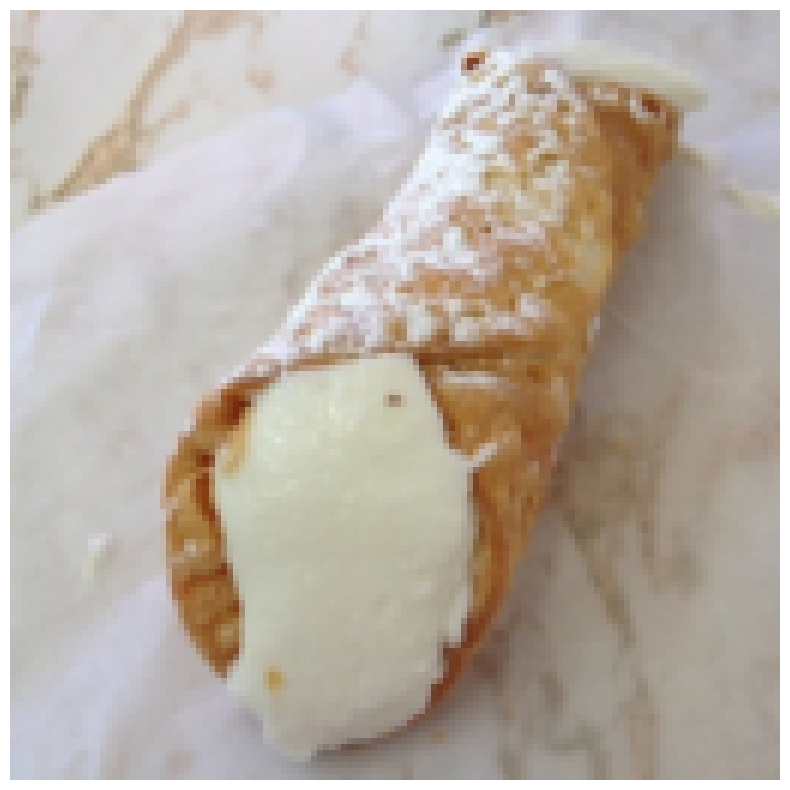

In [ ]:
index = random.randint(0, len(train_dataset) - 1)

image = train_dataset[index][0].permute(1, 2, 0).detach().cpu().numpy()

plt.figure(figsize=(10, 10))

plt.imshow(image)
plt.axis(False)
plt.show()

In [ ]:
def init_model(model):
    for par in model.parameters():
        if par.requires_grad:
            torch.nn.init.normal_(par, 0, 0.2)

    return model

In [ ]:
class ConvResBlock(torch.nn.Module):
    def __init__(self, channels, kernel=3, l=4):
        super().__init__()

        self.convs = torch.nn.ModuleList([self.__mini_conv_block(channels, kernel) for _ in range(l)])


    def __mini_conv_block(self, channels, kernel):
        return torch.nn.Sequential(
            torch.nn.Conv2d(channels, channels, kernel, 1, padding="same", padding_mode="reflect"),
            torch.nn.BatchNorm2d(channels),
            torch.nn.LeakyReLU()
        )


    def forward(self, x):
        for conv in self.convs:
            x = conv(x) + x

        return x


In [ ]:
class DCNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, classes, L=[4, 3, 2]):
        super().__init__()

        self.in_channels = in_channels
        self.hidden_channels = hidden_channels
        self.L = L
        self.classes = classes


        self.start = torch.nn.Sequential(
            torch.nn.Conv2d(self.in_channels, self.hidden_channels, 3, 1, padding="same", padding_mode="reflect"),
            torch.nn.BatchNorm2d(self.hidden_channels),
            torch.nn.LeakyReLU()
        )

        self.hidden = torch.nn.Sequential(*[torch.nn.Sequential(torch.nn.Conv2d(self.hidden_channels // (2 ** (i - 1)), self.hidden_channels // (2 ** i), 3, 1, padding="same", padding_mode="reflect"),
                                                                ConvResBlock(self.hidden_channels // (2 ** i), 3, l),
                                                                torch.nn.MaxPool2d(2, 2)) for i, l in enumerate(L, 1)])

        self.final = torch.nn.Sequential(
            torch.nn.Conv2d(self.hidden_channels // (2 ** (len(self.L))), self.classes, 4, 1),
            torch.nn.Flatten(),
            torch.nn.Softmax(dim=-1)
        )


    def forward(self, x):
        x = self.start(x)
        x = self.hidden(x)
        x = self.final(x)

        return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
model = DCNN(3, 128, 101, L=[1, 1, 1, 1, 1]).to(device)


In [ ]:
model

DCNN(
  (start): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=same, padding_mode=reflect)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (hidden): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=same, padding_mode=reflect)
      (1): ConvResBlock(
        (convs): ModuleList(
          (0): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same, padding_mode=reflect)
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): LeakyReLU(negative_slope=0.01)
          )
        )
      )
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=same, padding_mode=reflect)
      (1): ConvResBlock(
     

In [ ]:
noice = torch.randn(8, 3, 128, 128).to(device)


In [ ]:
%%time


model(noice).shape

CPU times: user 1.21 s, sys: 554 ms, total: 1.77 s
Wall time: 2.91 s


torch.Size([8, 101])

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
count_parameters(model)

158213

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Conv2d(3, 64, 3, 1),
    torch.nn.LazyBatchNorm2d(),
    torch.nn.ReLU(),
    torch.nn.Conv2d(64, 32, 3, 1),
    torch.nn.LazyBatchNorm2d(),
    torch.nn.ReLU(),
    torch.nn.Conv2d(32, 16, 3, 1),
    torch.nn.LazyBatchNorm2d(),
    torch.nn.ReLU(),
    torch.nn.Conv2d(16, 8, 3, 1),
    torch.nn.LazyBatchNorm2d(),
    torch.nn.ReLU(),
    torch.nn.Flatten(),
    torch.nn.LazyLinear(13),
    torch.nn.Softmax(dim=-1)
)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (4): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
  (7): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
  (10): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): LazyLinear(in_features=0, out_features=13, bias=True)
  (14): Softmax(dim=-1)
)

In [ ]:
noice = torch.randn(32, 3, 64, 64)

In [ ]:
model(noice).shape

torch.Size([32, 13])

In [ ]:
loss_f = torch.nn.CrossEntropyLoss()
opti = torch.optim.Adam(model.parameters())

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, 1)  # (128, 128) -> (126, 126)
        self.pool = nn.MaxPool2d(2, 2)       # (126, 126) -> (63, 63)
        self.conv2 = nn.Conv2d(64, 32, 3, 1) # (63, 63) -> (61, 61)
        self.conv3 = nn.Conv2d(32, 16, 3, 1) # (61, 61) -> (59, 59)
        self.conv4 = nn.Conv2d(16, 8, 3, 1)  # (59, 59) -> (57, 57)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(8 * 57 * 57, 128)
        self.fc2 = nn.Linear(128, 101)  # Assuming 101 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, x, y, transform):
        self.x = x.reset_index(drop=True)  # Reset index for x
        self.y = y.reset_index(drop=True)  # Reset index for y
        self.transform = transform

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        # Debugging: Check if idx is valid
        if idx >= len(self.x) or idx >= len(self.y):
            print(f"Index {idx} out of range.")
            raise IndexError(f"Index {idx} out of range.")

        # Additional debugging to ensure correct access
        try:
            image = Image.open(io.BytesIO(self.x[idx]["bytes"]))
        except KeyError as e:
            print(f"KeyError accessing index {idx}: {e}")
            raise
        image = self.transform(image)
        label = self.y[idx]
        return image, label


In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [ ]:
train_dataset = CustomDataset(train_df["image"], train_df["label"], transform)
val_dataset = CustomDataset(val_df["image"], val_df["label"], transform)

train_data_load = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_data_load = torch.utils.data.DataLoader(val_dataset, batch_size=32, num_workers=4, pin_memory=True)


In [ ]:
model = MyModel().to(device)

In [ ]:
loss_f = nn.CrossEntropyLoss()
opti = torch.optim.Adam(model.parameters())

In [ ]:
from time import time

In [ ]:
epochs = 10
history_train = []
history_val = []

In [ ]:
for epoch in range(1, epochs + 1):
    start_time = time()  # Record the start time
    total_train_loss = 0
    model.train()

    for batch_i, (x, y) in enumerate(train_data_load):
        x, y = x.to(device, non_blocking=True), y.to(device, non_blocking=True)

        opti.zero_grad()
        pred = model(x)
        loss = loss_f(pred, y)
        loss.backward()
        opti.step()

        total_train_loss += loss.item()

    total_train_loss /= len(train_data_load)

    total_val_loss = 0
    model.eval()

    with torch.no_grad():
        for x, y in val_data_load:
            x, y = x.to(device, non_blocking=True), y.to(device, non_blocking=True)
            pred = model(x)
            loss = loss_f(pred, y)
            total_val_loss += loss.item()

    total_val_loss /= len(val_data_load)

    history_train.append(total_train_loss)
    history_val.append(total_val_loss)

    epoch_time = time() - start_time  # Calculate the epoch time
    print(f"[Epoch: {epoch}/{epochs}; train_loss: {total_train_loss}; val_loss: {total_val_loss}; time: {epoch_time:.2f}s]")

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ce50ce97d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


[Epoch: 1/10; train_loss: 4.616132142173277; val_loss: 4.615243635298331; time: 4425.17s]


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ce50ce97d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ce50ce97d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

[Epoch: 2/10; train_loss: 4.615888727476468; val_loss: 4.615209507640404; time: 4316.66s]


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ce50ce97d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ce50ce97d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

In [ ]:
epochs = 10

history_train = []
history_val = []

for epoch in range(1, epochs + 1):
    total_train_loss = 0

    model.train()

    for batch_i, (x, y) in enumerate(iter(train_data_load)):
        x, y = x.to(torch.float32), y.to(torch.int64)

        pred = model(x)

        loss = loss_f(pred, y)

        opti.zero_grad()
        loss.backward()
        opti.step()

        total_train_loss += loss.item()

    total_train_loss /= len(train_data_load)

    total_val_loss = 0

    model.eval()

    for x, y in iter(val_data_load):
        with torch.inference_mode():
            pred = model(x)
            loss = loss_f(pred, y)

        total_val_loss += loss.item()

    total_val_loss /= len(val_data_load)

    history_train.append(total_train_loss)
    history_val.append(total_val_loss)

    print(f"[Epoch: {epoch}/{epochs}; train_loss: {total_train_loss}; val_loss: {total_val_loss}]")

KeyError: Caught KeyError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3653, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 147, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 176, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 75552

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 3761, in __getitem__
    indexer = self.columns.get_loc(key)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3655, in get_loc
    raise KeyError(key) from err
KeyError: 75552


In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(history_train)
plt.plot(history_val)

plt.show()